# 1. SENTIMENT ANALYSIS ON PRODUCT REVIEWS

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
json_file_path = 'dataset_en_train.json'
df = pd.read_json(json_file_path, lines=True)
df.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,en_0964290,product_en_0740675,reviewer_en_0342986,1,Arrived broken. Manufacturer defect. Two of th...,I'll spend twice the amount of time boxing up ...,en,furniture
1,en_0690095,product_en_0440378,reviewer_en_0133349,1,the cabinet dot were all detached from backing...,Not use able,en,home_improvement
2,en_0311558,product_en_0399702,reviewer_en_0152034,1,I received my first order of this product and ...,The product is junk.,en,home
3,en_0044972,product_en_0444063,reviewer_en_0656967,1,This product is a piece of shit. Do not buy. D...,Fucking waste of money,en,wireless
4,en_0784379,product_en_0139353,reviewer_en_0757638,1,went through 3 in one day doesn't fit correct ...,bubble,en,pc


In [ ]:
# only keep columns that are required
df = df[['review_body', 'review_title','stars']]
df = df.rename(columns={"review_body": "text", "review_title": "summary", "stars":"rating"})
df.head()

,text,summary,rating
0,Arrived broken. Manufacturer defect. Two of th...,I'll spend twice the amount of time boxing up ...,1
1,the cabinet dot were all detached from backing...,Not use able,1
2,I received my first order of this product and ...,The product is junk.,1
3,This product is a piece of shit. Do not buy. D...,Fucking waste of money,1
4,went through 3 in one day doesn't fit correct ...,bubble,1


In [ ]:
df = df.sample(20000, random_state=42)
len(df2)

200000

## Check if the dataset is balanced

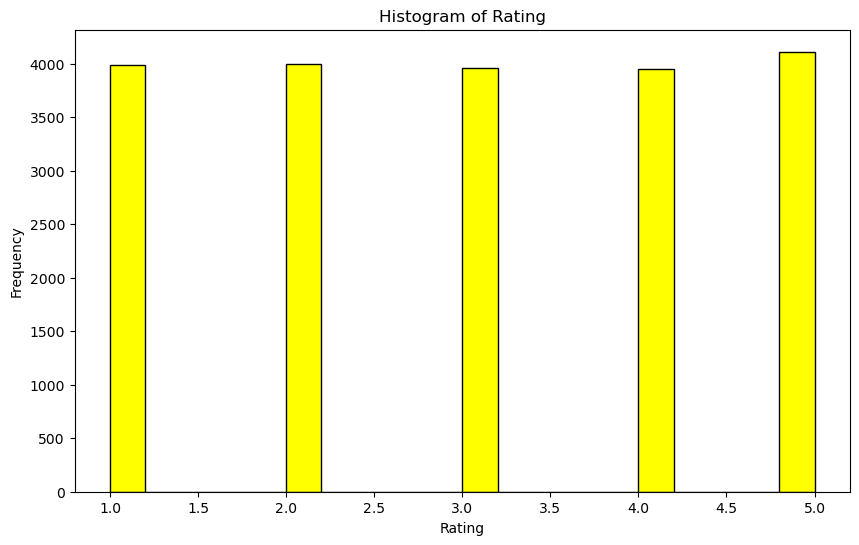

In [ ]:
import matplotlib.pyplot as plt

rating = df['rating']

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(rating, bins=20, color='yellow', edgecolor='black')
plt.title('Histogram of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df.to_csv('data/reviews.csv', index=False)

## Data Processing and Cleaning

In [ ]:
# Filtering out neutral reviews (ratings of 3)
filtered_df = df[df['rating'] != 3]

In [ ]:
# Mapping ratings to sentiment labels (1 for positive, 0 for negative)
filtered_df['sentiment'] = filtered_df['rating'].apply(lambda x: 1 if x > 3 else 0)


/var/folders/l0/2psbd05152j5n5116yzg2lyc0000gn/T/ipykernel_41487/713542639.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['sentiment'] = filtered_df['rating'].apply(lambda x: 1 if x > 3 else 0)


In [ ]:
filtered_df.head()

,text,summary,rating,sentiment
72272,"The leg openings are a little small, but other...",Crap,2,0
158154,Really cute mug. I would have given 5 stars if...,Four Stars,4,1
65426,Well it’s looks and feels okay but it most cer...,Lies!!,2,0
30074,"Very, very thin, you can bend them with you fi...",Thin and bendable :(,1,0
23677,Super cute! Loved it until I noticed that the ...,Came broken,1,0


In [ ]:
# Preparing the data for training and testing
X_new = filtered_df['text']  # The text of the reviews
y_new = filtered_df['sentiment']  # The sentiment labels derived from ratings


In [ ]:
# Splitting the dataset into training and testing sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)


In [ ]:
# Create a DataFrame from the X_train_words and y_train
train_dataset = pd.DataFrame({'text': X_train_new, 'sentiment': y_train_new})

# Display the combined training dataset
train_dataset.head()

,text,sentiment
129182,"Cute but junky. However, I guess you know that...",1
175114,Packs Small. Nice for bug-out bag. Spoon is bi...,1
17310,Way too small. I got a large for my 9.5 feet a...,0
199708,Material too thin. Can see through it,1
138553,i love this fanny pack. it fits all the things...,1


In [ ]:
train_dataset.to_csv('data/train_reviews.csv', index=False)

In [ ]:
# Create a DataFrame from the X_train_words and y_train
test_dataset = pd.DataFrame({'text': X_test_new, 'sentiment': y_test_new})

# Display the combined training dataset
test_dataset.head()

,text,sentiment
52253,"Controller works amazing, however the seller s...",0
11052,"It took a long time to arrive, and then broke ...",0
73757,This fan will definitely help to cool down you...,0
143855,I like these matzos better than any other. I j...,1
136244,I bought the neck/shoulder wrap version of thi...,1


In [ ]:
test_dataset.to_csv('data/test_reviews.csv', index=False)

In [ ]:
# Vectorizing the text
vectorizer_new = CountVectorizer(stop_words='english')
X_train_counts_new = vectorizer_new.fit_transform(X_train_new)
X_test_counts_new = vectorizer_new.transform(X_test_new)


In [ ]:
# Training the Naive Bayes classifier
clf_new = MultinomialNB()
clf_new.fit(X_train_counts_new, y_train_new)


MultinomialNB()

## Calculate the accuracy of the model

In [ ]:
# Predicting the test set results
y_pred_new = clf_new.predict(X_test_counts_new)

# Calculating the accuracy
accuracy_new = accuracy_score(y_test_new, y_pred_new)

# Print the accuracy
print(f'Accuracy: {accuracy_new}')


Accuracy: 0.8289186662511686


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test_new, y_pred_new)
precision = precision_score(y_test_new, y_pred_new)
recall = recall_score(y_test_new, y_pred_new)
f1 = f1_score(y_test_new, y_pred_new)

# Output the results
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))

Accuracy: 82.89%
Precision: 81.00%
Recall: 84.78%
F1 Score: 82.85%


## Confusion Matrix

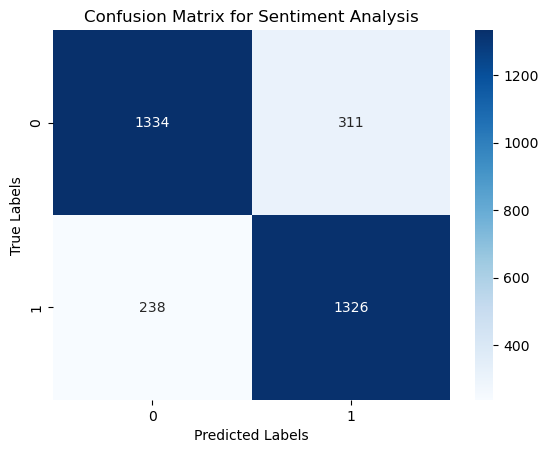

In [ ]:
conf_matrix = confusion_matrix(y_test_new, y_pred_new)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix for Sentiment Analysis')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# 2. CLASSIFYING SENTENCES IF THEY ARE IMPORTANT OR NOT BASED ON NAIVE BAYES

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import sent_tokenize
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import classification_report
from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE

In [ ]:
df1 = pd.read_csv('train.csv')

In [ ]:
df1.head()

,text,summary
0,The method of obtaining new integrable coupl...,Enlarged spectral problems and nonintegrability
1,The Open Science Collaboration recently repo...,Recent reproducibility estimates indicate that...
2,Inter-Prediction is used effectively in mult...,Improvements of Motion Estimation and Coding u...
3,Proton-proton collision data recorded in 201...,Observation of the ${B^0 \to \rho^0 \rho^0}$ d...
4,We give some higher dimensional analogues of...,"Multipartitions, Generalized Durfee Squares an..."


## Define a simple sentence tokenizer using basic Python string functions

In [ ]:
def simple_sent_tokenize(text):
    # Splitting by period followed by a space to approximate sentence boundaries
    sentences = [sentence.strip() for sentence in text.split('. ') if sentence]
    return sentences

In [ ]:
def label_sentences_simple(row):
    # Tokenize the text into sentences using the simple method
    sentences = simple_sent_tokenize(row['text'])
    # Re-initialize the TF-IDF Vectorizer to avoid fitting on previous texts
    tfidf_vectorizer = TfidfVectorizer()
    # Vectorize the sentences and the summary
    docs_tfidf = tfidf_vectorizer.fit_transform(sentences + [row['summary']])
    # Calculate cosine similarity between each sentence and the summary
    cos_similarities = cosine_similarity(docs_tfidf[-1], docs_tfidf[:-1]).flatten()
    # Determine a threshold for labeling a sentence as 'important'
    threshold = np.mean(cos_similarities) + np.std(cos_similarities)
    # Label sentences based on the threshold
    labels = ['important' if sim >= threshold else 'not important' for sim in cos_similarities]
    return list(zip(sentences, labels))

In [ ]:
# Apply the simple labeling function to a small subset to test
sample_data_simple = df.head(10).apply(label_sentences_simple, axis=1)
sample_data_simple

119737    [(Not strong enough to run a small 120v vacuum...
72272     [(The leg openings are a little small, but oth...
158154    [(Really cute mug, not important), (I would ha...
65426     [(Well it’s looks and feels okay but it most c...
30074     [(Very, very thin, you can bend them with you ...
23677     [(Super cute! Loved it until I noticed that th...
134858    [(Fairly thick material, so the poncho should ...
176418    [(These bags have a lot of space in them, good...
132467    [(Super cute and very sturdy set, important), ...
4082        [(Broke down after a month's use!!, important)]
dtype: object

In [ ]:
# Compile labeled sentences into a dataset
labeled_sentences = []
for entry in sample_data_simple:
    for sentence, label in entry:
        labeled_sentences.append((sentence, label))
labeled_df = pd.DataFrame(labeled_sentences, columns=['sentence', 'label'])

In [ ]:
# Feature Extraction with TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(labeled_df['sentence'])
y = labeled_df['label']

In [ ]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Print training datset

In [ ]:
# Create a DataFrame from the X_train_words and y_train
train_df = pd.DataFrame({'TF-IDF vectors of text': X_train, 'importance': y_train})

# Display the combined training dataset
train_df.head()

,TF-IDF vectors of text,importance
5,"(0, 82)\t0.6157108322264327\n (0, 29)\t0.49...",not important
20,"(0, 32)\t0.4574707548393325\n (0, 84)\t0.45...",important
11,"(0, 96)\t0.2253936696269525\n (0, 124)\t0.2...",important
3,"(0, 9)\t0.23186030905551236\n (0, 139)\t0.2...",important
4,"(0, 142)\t0.6768372897556043\n (0, 138)\t0....",important


In [ ]:
train_df.to_csv('data/train_train.csv', index=False)

## Print testing dataset

In [ ]:
# Create a DataFrame from the X_train_words and y_train
test_df = pd.DataFrame({'TF-IDF vectors of text': X_test, 'importance': y_test})

# Display the combined training dataset
test_df.head()

,TF-IDF vectors of text,importance
0,"(0, 21)\t0.29919428427597333\n (0, 24)\t0.2...",important
13,"(0, 146)\t0.3225369642738519\n (0, 52)\t0.2...",not important
8,"(0, 101)\t0.244254761995403\n (0, 102)\t0.2...",important
1,"(0, 75)\t0.22014525722111444\n (0, 105)\t0....",important
15,"(0, 19)\t0.39892055822439054\n (0, 56)\t0.3...",important


In [ ]:
test_df.to_csv('data/test_train.csv', index=False)

In [ ]:
# Train a Multinomial Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model with zero_division parameter set to 0
report = classification_report(y_test, y_pred, zero_division=0)

print(report)

               precision    recall  f1-score   support

    important       0.80      1.00      0.89         4
not important       0.00      0.00      0.00         1

     accuracy                           0.80         5
    macro avg       0.40      0.50      0.44         5
 weighted avg       0.64      0.80      0.71         5



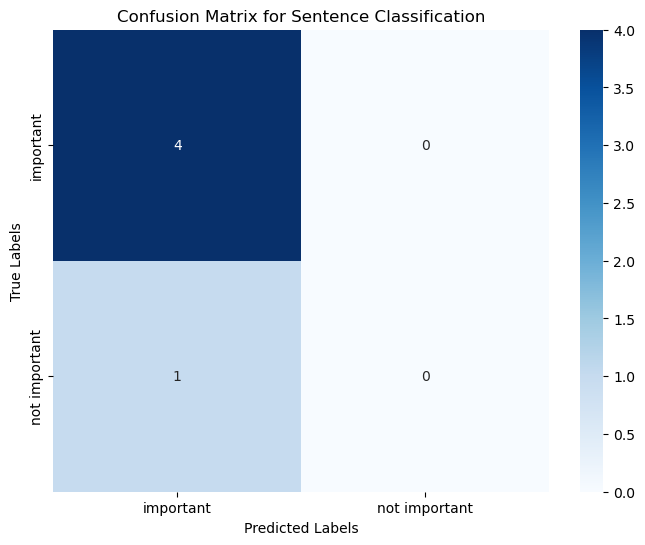

In [ ]:
# True labels
y_true = ['important'] * 4 + ['not important'] * 1  # Based on support values
# Predicted labels
y_pred = ['important'] * 5  # Inferred from F1 score, precision, and recall of 'not important' class being 0

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=['important', 'not important'])

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['important', 'not important'], yticklabels=['important', 'not important'])
plt.title('Confusion Matrix for Sentence Classification')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## Improving the scores by balancing the dataset using SMOTE

In [ ]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3))
X = tfidf_vectorizer.fit_transform(labeled_df['sentence'])

# Get the labels
labels = labeled_df['label']

# Convert labels to a numeric format
labels = labels.map({'not important': 0, 'important': 1})

# Compute class weights
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(labels), y=labels)
class_weight_dict = dict(enumerate(class_weights))

# Over-sampling using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train a Multinomial Naive Bayes classifier with class weight
model = MultinomialNB(alpha=0.1)
model.fit(X_train, y_train, sample_weight=y_train.map(class_weight_dict))

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



## Confusion Matrix

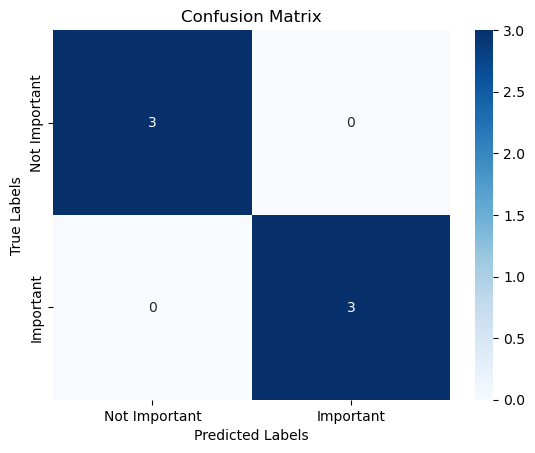

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Theoretical confusion matrix data based on your results
cm_data = np.array([[3, 0], [0, 3]])

# Creating a heatmap
sns.heatmap(cm_data, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Important', 'Important'], yticklabels=['Not Important', 'Important'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
